In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format

print("Guide to read results")
print("GCN , Deepsets, Deepsets (prop training) are three different models")
print("GCN and Deepsets have been trained on curriculum sampling at most 2 assignments in reach/avoid")
print("Deepsets (prop training) has also seen complete pieces assignments in training")

Guide to read results
GCN , Deepsets, Deepsets (prop training) are three different models
GCN and Deepsets have been trained on curriculum sampling at most 2 assignments in reach/avoid
Deepsets (prop training) has also seen complete pieces assignments in training


In [2]:
def read_results(env_name):
    parent = "results_chessworld/" + env_name + "/"
    
    gcn_name =  parent + env_name + "_gcn.csv"
    deepsets_name = parent + env_name + "_deepsets_full.csv"
    deepsets_prop_name = parent + env_name + "_deepsets_prop.csv"
    
    df_gcn = pd.read_csv(gcn_name).drop(columns=["Avg Discounted Return"])
    df_dps = pd.read_csv(deepsets_name).drop(columns=["Avg Discounted Return"])
    df_prop = pd.read_csv(deepsets_prop_name).drop(columns=["Avg Discounted Return"])

    df_gcn.set_index(["Task Set", "Task ID"], inplace=True)
    df_dps.set_index(["Task Set", "Task ID"], inplace=True)
    df_prop.set_index(["Task Set", "Task ID"], inplace=True)

    df_concat = pd.concat([df_gcn, df_dps, df_prop], axis=1, keys=["GCN", "Deepsets", "Deepsets (prop training)"])

    return df_concat


In [3]:
def generalized_read_results(env_name, files, keys):
    parent = "results_chessworld/" + env_name + "/"
    all_dfs = []

    for file in files:
        cur_name = parent + file + ".csv"
        cur_df = pd.read_csv(cur_name)
        cur_df.set_index(["Task Set", "Task ID"], inplace=True)

        if "Avg Discounted Return" in cur_df.columns:
            cur_df.drop(columns=["Avg Discounted Return"], inplace=True)

        all_dfs.append(cur_df)

    df_concat = pd.concat(all_dfs, axis=1, keys=keys)

    return df_concat

In [4]:
def seed_read_results(env_name, files, keys, seeds):
    parent = "results_chessworld/" + env_name + "/"
    final_dfs = {}

    for seed in seeds:
        all_dfs = []
        for file in files:
            cur_name = parent + str(seed) + "/" + file + ".csv"
            cur_df = pd.read_csv(cur_name)
            cur_df.set_index(["Task Set", "Task ID"], inplace=True)
    
            if "Avg Discounted Return" in cur_df.columns:
                cur_df.drop(columns=["Avg Discounted Return"], inplace=True)
    
            all_dfs.append(cur_df)
    
        df_concat = pd.concat(all_dfs, axis=1, keys=keys)
        final_dfs[seed] = df_concat

    df_mean = sum(final_dfs.values()) / len(final_dfs)
    return final_dfs, df_mean

In [5]:
# ChessWorld-v0 tasks and results

tasks_v0 = "eval_datasets/ChessWorld-v0/tasks.txt"

with open(tasks_v0, 'r') as file:
    for line in file:
        print(line[:-1])

Avoid 2
A2_1 (!(bishop | knight) U queen) good
A2_2 (!(pawn | bishop) U (bishop & rook)) good
A2_3 (!(queen | pawn) U (rook & queen & !pawn)) good
A2_4 (!(bishop | pawn) U (rook & knight)) good
A2_5 (!(pawn | knight) U (queen & rook &!pawn) & (F pawn)) good
A2_6 (!(pawn | rook) U (!queen & rook & !pawn) & (F knight)) good
Avoid 3
A3_1 (!(bishop | knight | pawn) U (rook & queen & !pawn)) good
A3_2 (!(knight | rook | bishop) U (rook & bishop)) alright
A3_3 (!(bishop | pawn | rook) U (rook & queen & !pawn)) good
A3_4 (!(bishop | knight | queen) U (rook & queen & !pawn)) good
Avoid 4
A4_1 (!(bishop | rook | knight | queen) U (pawn & !queen & !rook)) alright
A4_2 (!(pawn | rook | knight | bishop) U (queen & rook & !pawn) & (F (bishop | knight))) good
Reach 2
R2_1 (F bishop & (F queen))
R2_2 (F rook & (F knight))
R2_3 (F queen & (F bishop))
R2_4 (F knight & (F (pawn & queen & !rook)))
Reach 3
R3_1 (F queen & (F bishop & (F pawn)))
R3_2 (F knight & (F bishop & (F rook)))
Avoid Easy
AE_1 (!(bi

In [6]:
read_results("ChessWorld-v0")

GCN                Deepsets            \
                   Successes x/6 Avg Steps Successes x/6 Avg Steps   
Task Set   Task ID                                                   
Avoid 2    A2_1                6      2.67             4      2.50   
           A2_2                5      4.80             1      3.00   
           A2_3                6      3.83             4      4.25   
           A2_4                6      4.50             2      2.50   
           A2_5                5      6.80             0       NaN   
           A2_6                6      3.67             5      2.60   
Avoid 3    A3_1                5      4.80             0       NaN   
           A3_2                3      3.00             0       NaN   
           A3_3                6      5.00             0       NaN   
           A3_4                4      3.25             0       NaN   
Avoid 4    A4_1                3      2.00             0       NaN   
           A4_2                5      5.80             0       NaN   
Reach 2    R2_1                6      3.50             6      2.67   
           R2_2                6      3.00             6      2.00   
           R2_3                6      3.50             6      2.67   
           R2_4                6      4.00             5      3.00   
Reach 3    R3_1                6      4.50             6      2.67   
           R3_2                6      3.83             6      2.83   
Avoid Easy AE_1                6      2.00             1      1.00   
           AE_2                4      3.50             6      1.83   
           AE_4                6      1.33             6      1.00   
           AE_5                5      4.80             5      1.80   
           AE_6                6      3.67             6      2.17   
           AE_7                0       NaN             1      1.00   
           AE_8                6      2.67             4      2.50   
           AE_9                6      2.67             6      2.83   

                   Deepsets (prop training)            
                              Successes x/6 Avg Steps  
Task Set   Task ID                                     
Avoid 2    A2_1                           6      2.50  
           A2_2                           3      4.00  
           A2_3                           6      3.50  
           A2_4                           6      4.17  
           A2_5                           6      7.00  
           A2_6                           6      2.67  
Avoid 3    A3_1                           4      4.50  
           A3_2                           2      2.50  
           A3_3                           6      5.17  
           A3_4                           2      2.50  
Avoid 4    A4_1                           3      2.00  
           A4_2                           4      5.50  
Reach 2    R2_1                           6      2.17  
           R2_2                           6      2.00  
           R2_3                           6      2.17  
           R2_4                           6      2.83  
Reach 3    R3_1                           6      2.67  
           R3_2                           6      2.83  
Avoid Easy AE_1                           6      2.00  
           AE_2                           6      1.83  
           AE_4                           6      1.00  
           AE_5                           6      2.00  
           AE_6                           6      2.33  
           AE_7                           3      2.00  
           AE_8                           6      2.50  
           AE_9                           6      2.50

In [7]:
# ChessWorld-v1 tasks and results

tasks_v0 = "eval_datasets/ChessWorld-v1/tasks.txt"

with open(tasks_v0, 'r') as file:
    for line in file:
        print(line[:-1])

(F (pawn & F(rook & F(knight))))
(F ((rook&queen) & (F bishop)))
(F (bishop & rook) & (F (bishop & knight)))
(!(pawn | bishop) U (bishop & rook))
(!(queen | pawn) U (rook & queen))
(!(bishop | pawn) U (rook & knight))
(! (knight | rook) U bishop)
(! (bishop | knight) U queen)
(! (rook | bishop) U pawn)
(!(bishop | knight | pawn) U (rook & queen))
(!(knight | rook | bishop) U (rook & bishop))
(!(bishop | pawn | rook) U (rook & queen))
(!(bishop | knight | queen) U (rook & queen))
(!(bishop | rook | knight | pawn) U (queen))
(!(bishop | rook | knight | queen) U (pawn))
(!(bishop | rook | pawn | queen) U (knight))
(!(bishop | knight | pawn | queen) U (rook))
(!(rook | knight | pawn | queen) U (bishop))
(!(bishop | rook | knight | pawn | queen) U (queen & pawn))
(!(bishop | rook | knight | queen | pawn) U (pawn & rook))
(!(bishop | rook | pawn | queen | knight) U (knight & bishop))
(!(bishop | knight | pawn | queen | rook) U (rook & knight))
(!(rook | knight | pawn | queen | bishop) U (bis

In [8]:
read_results("ChessWorld-v1")

GCN                 Deepsets            \
                   Successes x/29 Avg Steps Successes x/29 Avg Steps   
Task Set   Task ID                                                     
Avoid 2    A2_1                24      4.08             14      2.79   
           A2_2                26      4.50              8      1.88   
           A2_3                28      5.39              8      2.62   
           A2_4                19      3.05              1      2.00   
           A2_5                18      6.50             14      6.00   
           A2_6                29      6.00             28      6.89   
Avoid 3    A3_1                 7      2.43              1      1.00   
           A3_2                16      3.69              6      2.33   
           A3_3                25      5.72              1      1.00   
           A3_4                 7      2.43              0       NaN   
Avoid 4    A4_1                16      2.62              1      1.00   
           A4_2                 6      4.17              0       NaN   
Avoid 5    A5_1                 6      2.17              2      1.50   
Reach 2    R2_1                29      3.72             29      3.72   
           R2_2                29      3.69             29      3.03   
           R2_3                29      3.72             29      3.72   
           R2_4                29      5.62             29      3.76   
Reach 3    R3_1                29      4.17             29      3.66   
           R3_2                29      4.45             29      3.79   
Avoid Easy AE_1                 7      1.86             11      2.09   
           AE_2                27      4.85             24      2.54   
           AE_4                28      1.68             13      1.69   
           AE_5                22      5.64             15      4.87   
           AE_6                29      5.83             29      3.48   
           AE_7                 6      1.67             14      2.21   
           AE_8                 4      1.25             11      2.09   
           AE_9                 4      1.25             17      2.24   

                   Deepsets (prop training)            
                             Successes x/29 Avg Steps  
Task Set   Task ID                                     
Avoid 2    A2_1                           8      2.12  
           A2_2                           8      2.25  
           A2_3                           7      2.71  
           A2_4                           4      2.00  
           A2_5                          20      8.65  
           A2_6                          29      6.17  
Avoid 3    A3_1                           8      4.75  
           A3_2                          13      4.08  
           A3_3                           8      4.75  
           A3_4                           1      1.00  
Avoid 4    A4_1                          13      2.54  
           A4_2                           1      4.00  
Avoid 5    A5_1                           1      1.00  
Reach 2    R2_1                          29      3.93  
           R2_2                          29      3.14  
           R2_3                          29      3.93  
           R2_4                          29      4.17  
Reach 3    R3_1                          29      3.97  
           R3_2                          29      4.66  
Avoid Easy AE_1                           9      2.44  
           AE_2                          22      3.00  
           AE_4                          29      1.86  
           AE_5                          21      6.14  
           AE_6                          29      3.72  
           AE_7                          19      2.95  
           AE_8                           9      2.44  
           AE_9                          19      2.58

In [9]:
# ChessWorld-v2 tasks and results

tasks_v0 = "eval_datasets/ChessWorld-v2/tasks.txt"

with open(tasks_v0, 'r') as file:
    for line in file:
        print(line[:-1])

Avoid 2
A2_1 (!(bishop | knight) U queen) good
A2_2 (!(pawn | bishop) U (bishop & rook)) good
A2_3 (!(queen | pawn) U (rook & queen & !pawn)) good
A2_4 (!(bishop | pawn) U (rook & knight)) good
A2_5 (!(pawn | knight) U (queen & rook &!pawn) & (F pawn)) good
A2_6 (!(pawn | rook) U (!queen & rook & !pawn) & (F knight)) good
Avoid 3
A3_1 (!(bishop | knight | pawn) U (rook & queen & !pawn)) good
A3_2 (!(knight | rook | bishop) U (rook & bishop)) alright
A3_3 (!(bishop | pawn | rook) U (rook & queen & !pawn)) good
A3_4 (!(bishop | knight | queen) U (rook & queen & !pawn)) good
Avoid 4
A4_1 (!(bishop | rook | knight | queen) U (pawn & !queen & !rook)) alright
A4_2 (!(pawn | rook | knight | bishop) U (queen & rook & !pawn) & (F (bishop | knight))) good
Reach 2
R2_1 (F bishop & (F queen))
R2_2 (F rook & (F knight))
R2_3 (F queen & (F bishop))
R2_4 (F knight & (F (pawn & queen & !rook)))
Reach 3
R3_1 (F queen & (F bishop & (F pawn)))
R3_2 (F knight & (F bishop & (F rook)))
Avoid Easy
AE_1 (!(bi

In [10]:
read_results("ChessWorld-v2")

GCN                 Deepsets            \
                   Successes x/30 Avg Steps Successes x/30 Avg Steps   
Task Set   Task ID                                                     
Avoid 2    A2_1                26      3.42             28      3.75   
           A2_2                25      4.60             18      4.83   
           A2_3                29      4.79             25      5.12   
           A2_4                20      3.20              4      2.50   
           A2_5                22      6.68             26      8.54   
           A2_6                29      3.76             26      7.23   
Avoid 3    A3_1                21      4.52             25      6.68   
           A3_2                17      5.06              0       NaN   
           A3_3                22      4.50             16      5.31   
           A3_4                23      4.61             11      2.82   
Avoid 4    A4_1                21      3.10              4      1.25   
           A4_2                22      6.68             16      7.69   
Reach 2    R2_1                30      6.37             30      4.83   
           R2_2                30      3.73             30      3.37   
           R2_3                30      6.37             30      4.83   
           R2_4                30      4.87             30      5.53   
Reach 3    R3_1                30      9.40             30      4.87   
           R3_2                30      5.30             30      4.37   
Avoid Easy AE_1                26      3.42             28      3.75   
           AE_2                25      3.12              8      1.88   
           AE_4                29      1.76             30      2.03   
           AE_5                24      6.83             21      6.14   
           AE_6                30      3.93             29      5.59   
           AE_7                21      3.10             27      5.70   
           AE_8                20      3.25             18      3.89   
           AE_9                23      2.96             28      3.46   

                   Deepsets (prop training)            
                             Successes x/30 Avg Steps  
Task Set   Task ID                                     
Avoid 2    A2_1                          27      3.41  
           A2_2                          26      5.69  
           A2_3                          30      5.17  
           A2_4                          30      6.40  
           A2_5                          24     10.50  
           A2_6                          30      5.53  
Avoid 3    A3_1                          24      6.83  
           A3_2                           8      3.62  
           A3_3                          29      6.41  
           A3_4                          12      3.33  
Avoid 4    A4_1                           9      1.78  
           A4_2                          21     10.43  
Reach 2    R2_1                          30      4.07  
           R2_2                          30      2.93  
           R2_3                          30      4.07  
           R2_4                          30      4.23  
Reach 3    R3_1                          30      4.13  
           R3_2                          30      3.97  
Avoid Easy AE_1                          27      3.41  
           AE_2                          29      3.31  
           AE_4                          30      1.73  
           AE_5                          24      5.38  
           AE_6                          30      3.17  
           AE_7                          22      5.64  
           AE_8                          20      3.45  
           AE_9                          21      3.14

In [11]:
def make_ablation_graphs(goal, parent="chessworld8_ablation/"):
    df = pd.read_csv(parent + goal + "/results.csv", index_col=0, header=[0,1])

    # successes_mean_df = df.xs("successes_mean", axis=1, level=1)  # Get all 'successes_mean' values

    # # Plot each column
    # plt.figure(figsize=(8, 5))
    # for col in successes_mean_df.columns:
    #     plt.plot(successes_mean_df.index, successes_mean_df[col], marker="o", label=col)
    
    # # Formatting
    # plt.xlabel("X-axis Label (e.g., Task Number)")
    # plt.ylabel("Success Rate")
    # plt.title("Success Rates Across Models")
    # plt.legend(title="Model")
    # plt.grid(True)
    
    # # Show plot
    # plt.show()


    # Extract successes_mean and successes_std
    successes_mean_df = df.xs("successes_mean", axis=1, level=1)  # Mean values
    successes_std_df = df.xs("successes_std", axis=1, level=1)    # Standard deviation values
    
    # Plot each model with error bars
    plt.figure(figsize=(8, 5))
    for col in successes_mean_df.columns:
        plt.errorbar(
            successes_mean_df.index, 
            successes_mean_df[col], 
            yerr=successes_std_df[col],  # Add standard deviation as error bars
            fmt="o-",  # Markers with lines
            capsize=4,  # Small caps on error bars
            label=col
        )
    
    # Formatting
    plt.xlabel("Cardinality of avoid set")
    plt.ylabel("Success Rate")
    plt.title(goal)
    plt.legend(title="Model")
    plt.grid(True)
    
    # Show plot
    plt.show()

    

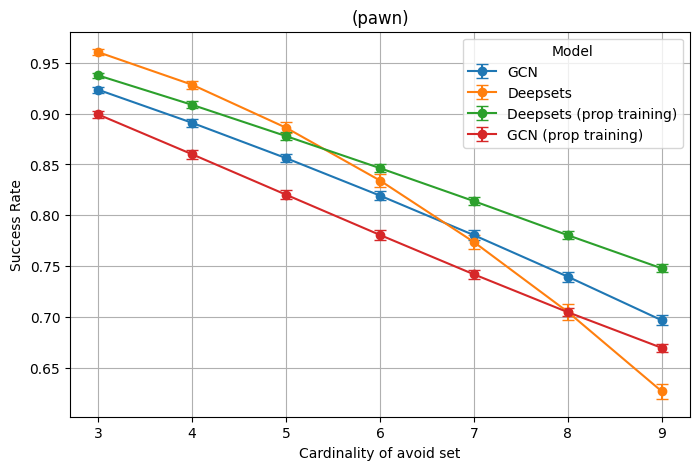

In [12]:
make_ablation_graphs("(pawn)")

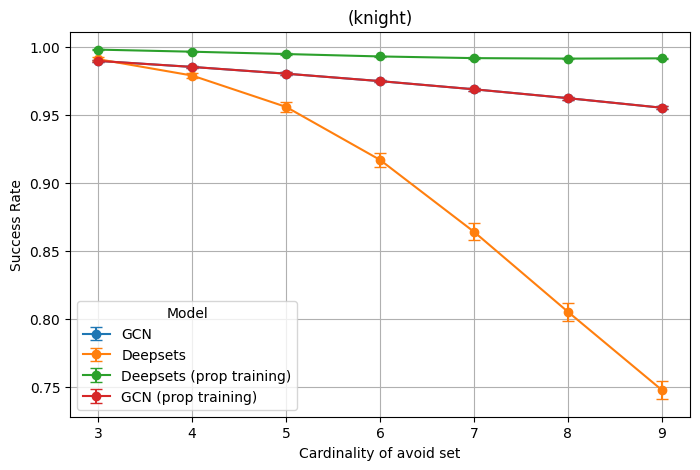

In [13]:
make_ablation_graphs("(knight)")

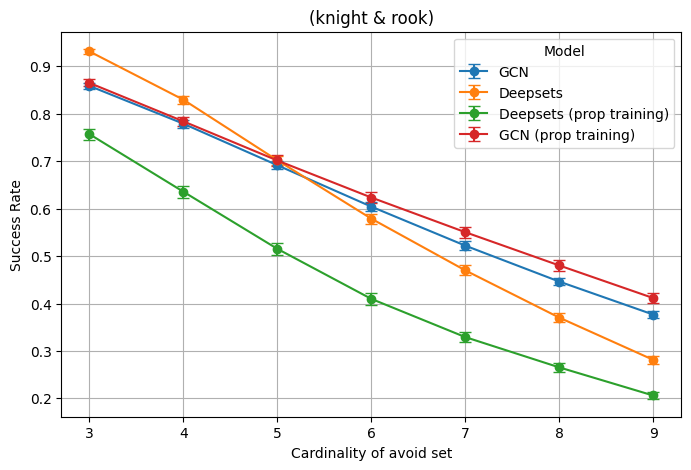

In [14]:
make_ablation_graphs("(knight & rook)")

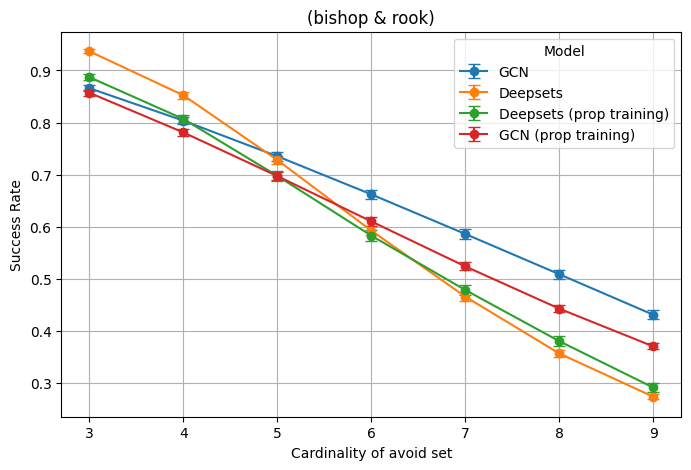

In [15]:
make_ablation_graphs("(bishop & rook)")

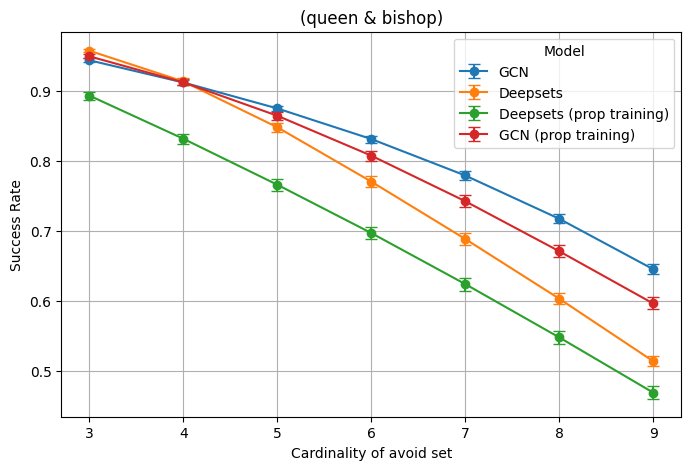

In [16]:
make_ablation_graphs("(queen & bishop)")

In [17]:
print("Guide to read new results")
print("GCN , Deepsets are the models, trained on different curriculums")
print("The number in brackets indicates threshold for completing training")
print("Leaving model to train usually ends up in overfitting the reach stay task")

Guide to read new results
GCN , Deepsets are the models, trained on different curriculums
The number in brackets indicates threshold for completing training
Leaving model to train usually ends up in overfitting the reach stay task


In [18]:
# ChessWorld-v1 new finite tasks and results

tasks_v0 = "eval_datasets/ChessWorld-v1/finite_tasks.txt"

with open(tasks_v0, 'r') as file:
    for line in file:
        print(line[:-1])

Reach
R_1 (F (pawn & F(rook & F(knight))))
R_2 (F ((rook&queen) & (F bishop)))
R_3 (F (bishop & rook) & (F (bishop & knight)))
Avoid 2
A2_1 (!(pawn | bishop) U (bishop & rook)) good
A2_2 (!(queen | pawn) U (rook & queen)) good
A2_3 (!(bishop | pawn) U (rook & knight)) good
A2_4 (! (knight | rook) U bishop)
A2_5 (! (bishop | knight) U queen)
A2_6 (! (rook | bishop) U pawn)
Avoid 3
A3_1 (!(bishop | knight | pawn) U (rook & queen)) good
A3_2 (!(knight | rook | bishop) U (rook & bishop)) alright
A3_3 (!(bishop | pawn | rook) U (rook & queen)) good
A3_4 (!(bishop | knight | queen) U (rook & queen)) good
Avoid 4
A4_1 (!(bishop | rook | knight | pawn) U (queen))
A4_2 (!(bishop | rook | knight | queen) U (pawn))
A4_3 (!(bishop | rook | pawn | queen) U (knight))
A4_4 (!(bishop | knight | pawn | queen) U (rook))
A4_5 (!(rook | knight | pawn | queen) U (bishop))
Avoid 5
A5_1 (!(bishop | rook | knight | pawn | queen) U (queen & pawn))
A5_2 (!(bishop | rook | knight | queen | pawn) U (pawn & rook))

In [19]:
keys_new = ['Deepsets (0.85)', 'Deepsets (0.9)', 'Deepsets (15M)', 'GCN (0.85)', 'GCN (0.9)', 'GCN (15M)', 'GCN (defrosted 25M)']

In [20]:
files_finite = ['ChessWorld-v1_deepsets_stay_update_4',
                'ChessWorld-v1_deepsets_stay_update_4_fine',
                'ChessWorld-v1_deepsets_stay_update_4_finest',
                'ChessWorld-v1_gcn_formula_big_skip_6',
                'ChessWorld-v1_gcn_formula_big_skip_6_fine',
                'ChessWorld-v1_gcn_formula_big_skip_6_finer',
                'ChessWorld-v1_gcn_formula_big_skip_6_finest'
               ]

generalized_read_results('ChessWorld-v1', files_finite, keys_new)

Deepsets (0.85)           Deepsets (0.9)  \
                                 Successes x/29 Avg Steps Successes x/29   
Task Set                Task ID                                            
Reach                   R_1                  29      3.79             29   
                        R_2                  29      4.90             29   
                        R_3                  29      6.07             29   
Avoid 2                 A2_1                  6      2.17              3   
                        A2_2                 27      3.11             28   
                        A2_3                  4      1.50              2   
                        A2_4                 10      7.20             10   
                        A2_5                 19      3.68             19   
Avoid 3                 A3_1                  1      1.00              0   
                        A3_2                  3      1.33             11   
                        A3_3                 23      4.48             23   
                        A3_4                  1      1.00              1   
Avoid 4                 A4_1                  3      2.00              3   
                        A4_2                  9      1.89              9   
                        A4_3                 15      1.47             15   
                        A4_4                 13      2.00             12   
                        A4_5                 17      2.76             21   
Avoid 5                 A4_1                  0       NaN              0   
                        A4_2                  0       NaN              1   
                        A4_3                  2      1.00              2   
                        A4_4                  2      1.00              2   
                        A4_5                  3      2.00              3   
                        A4_6                  0       NaN              0   
Reach Avoid General     RA_1                 29      2.97             29   
                        RA_2                 23      1.70             26   
                        RA_3                 14      2.71              1   
                        RA_4                 20      2.40             20   
                        RA_5                 28      3.61             26   
                        RA_6                  7      2.29             14   
                        RA_7                 16      3.06             16   
Reach Avoid X and not Y RXNY_1               25      3.68             25   
                        RXNY_2               21      3.86             21   
                        RXNY_3               12      1.58              9   
                        RXNY_4               15      1.80             25   
                        RXNY_5               13      1.23             13   

                                          Deepsets (15M)            \
                                Avg Steps Successes x/29 Avg Steps   
Task Set                Task ID                                      
Reach                   R_1          3.62             29      3.79   
                        R_2          4.90             29      4.90   
                        R_3          6.03             29      5.76   
Avoid 2                 A2_1         2.00             27      4.70   
                        A2_2         3.11             28      3.04   
                        A2_3         1.00              4      1.50   
                        A2_4         7.30             23      5.78   
                        A2_5         3.37             27      3.48   
Avoid 3                 A3_1          NaN             11      3.27   
                        A3_2         2.64             13      2.46   
                        A3_3         3.13             25      3.20   
                        A3_4         1.00             22      3.09   
Avoid 4                 A4_1         2.00              8      1.75   
                       

In [21]:
# ChessWorld-v1 infinite tasks and results

tasks_v0 = "eval_datasets/ChessWorld-v1/infinite_tasks.txt"

with open(tasks_v0, 'r') as file:
    for line in file:
        print(line[:-1])

Reach infinite training
RIT_1 (F (G bishop))
RIT_2 (F (G queen))
RIT_3 (F (G rook))
RIT_4 (F (G pawn))
RIT_5 (F (G knight))
RIT_6 (F (G (queen | bishop)))
RIT_7 (F (G (rook | queen)))
RIT_8 (F (G (knight | pawn)))
RIT_9 (F (G (bishop | knight)))
RIT_10 (F (G (rook | pawn)))
Reach avoid always eventually
RAE_1 ((G (F knight)) & (G (F queen)))
RAE_2 ((G (F pawn)) & (G (F rook)))
RAE_3 ((G (F bishop)) & (G (F knight)) & (G (! rook)))
RAE_4 ((G (F rook)) & (G (F pawn)) & (G (! knight)))
Reach stay infinite
RSI_1 (F (G (bishop & !rook)))
RSI_2 (F (G (knight & !bishop)))
RSI_3 (F (G (queen & pawn)))
RSI_4 (F (G (rook & queen)))
RSI_5 (F (G (queen & pawn))


In [22]:
files_infinite = ['ChessWorld-v1_deepsets_stay_update_4_inf',
                  'ChessWorld-v1_deepsets_stay_update_4_fine_inf',
                  'ChessWorld-v1_deepsets_stay_update_4_finest_inf',
                  'ChessWorld-v1_gcn_formula_big_skip_6_inf',
                  'ChessWorld-v1_gcn_formula_big_skip_6_fine_inf',
                  'ChessWorld-v1_gcn_formula_big_skip_6_finer_inf',
                  'ChessWorld-v1_gcn_formula_big_skip_6_finest_inf'
                 ]

generalized_read_results('ChessWorld-v1', files_infinite, keys_new)

Deepsets (0.85)   Deepsets (0.9)  \
                                      Accepting visits Accepting visits   
Task Set                      Task ID                                     
Reach infinite training       RIT_1              97.07            97.07   
                              RIT_2              86.10            93.38   
                              RIT_3              18.90            85.28   
                              RIT_4               3.79            18.59   
                              RIT_5              93.93            90.10   
                              RIT_6              97.17            97.10   
                              RIT_7              12.10            79.03   
                              RIT_8              78.41            74.79   
                              RIT_9              97.00            96.17   
                              RIT_10             29.83            54.00   
Reach avoid always eventually RAE_1              25.38            18.79   
                              RAE_2              47.90            46.41   
                              RAE_3              39.03            36.03   
                              RAE_4               8.10            15.24   
Reach stay infinite           RSI_1              95.72            94.21   
                              RSI_2               4.10             3.97   
                              RSI_3              86.48            93.48   
                              RSI_4              61.52            95.86   
                              RSI_5              86.48            93.48   

                                        Deepsets (15M)       GCN (0.85)  \
                                      Accepting visits Accepting visits   
Task Set                      Task ID                                     
Reach infinite training       RIT_1              97.41            75.66   
                              RIT_2              89.48            94.31   
                              RIT_3              95.86            93.41   
                              RIT_4              96.24            93.86   
                              RIT_5              94.97            18.21   
                              RIT_6              97.48            84.97   
                              RIT_7              94.00            95.07   
                              RIT_8              96.45            88.24   
                              RIT_9              91.38            93.45   
                              RIT_10             95.21            91.76   
Reach avoid always eventually RAE_1              45.10            20.79   
                              RAE_2              37.52            97.38   
                              RAE_3              45.69            65.00   
                              RAE_4              21.21            73.03   
Reach stay infinite           RSI_1              79.41            73.83   
                              RSI_2              96.10            37.72   
                              RSI_3              85.55            92.41   
                              RSI_4              94.10            94.31   
                              RSI_5              85.55            92.41   

                                             GCN (0.9)        GCN (15M)  \
                                      Accepting visits Accepting visits   
Task Set                      Task ID                                     
Reach infinite training       RIT_1              95.38            93.86   
                              RIT_2              95.41            95.41   
                              RIT_3              94.72            95.17   
                              RIT_4              95.34            95.38   
                              RIT_5              50.69            90.55   
                              RIT_6              94.90            91.79   
                              RIT_7              95.41        

In [23]:
def make_ablation_graphs_smaller(goal, parent="chessworld8_ablation/", alpha=10):
    df = pd.read_csv(parent + goal + "/results.csv", index_col=0, header=[0,1])

    # successes_mean_df = df.xs("successes_mean", axis=1, level=1)  # Get all 'successes_mean' values

    # # Plot each column
    # plt.figure(figsize=(8, 5))
    # for col in successes_mean_df.columns:
    #     plt.plot(successes_mean_df.index, successes_mean_df[col], marker="o", label=col)
    
    # # Formatting
    # plt.xlabel("X-axis Label (e.g., Task Number)")
    # plt.ylabel("Success Rate")
    # plt.title("Success Rates Across Models")
    # plt.legend(title="Model")
    # plt.grid(True)
    
    # # Show plot
    # plt.show()


    # Extract successes_mean and successes_std
    successes_mean_df = df.xs("successes_mean", axis=1, level=1)  # Mean values
    successes_std_df = df.xs("successes_std", axis=1, level=1)    # Standard deviation values
    
    # Plot each model with error bars
    plt.figure(figsize=(8, 5))
    for col in successes_mean_df.columns:
        plt.errorbar(
            successes_mean_df.index, 
            successes_mean_df[col], 
            yerr=successes_std_df[col] / alpha,  # Add standard deviation as error bars
            fmt="o-",  # Markers with lines
            capsize=4,  # Small caps on error bars
            label=col
        )
    
    # Formatting
    plt.xlabel("Cardinality of avoid set")
    plt.ylabel("Success Rate")
    plt.title(goal)
    plt.legend(title="Model")
    plt.grid(True)
    
    # Show plot
    plt.show()

    

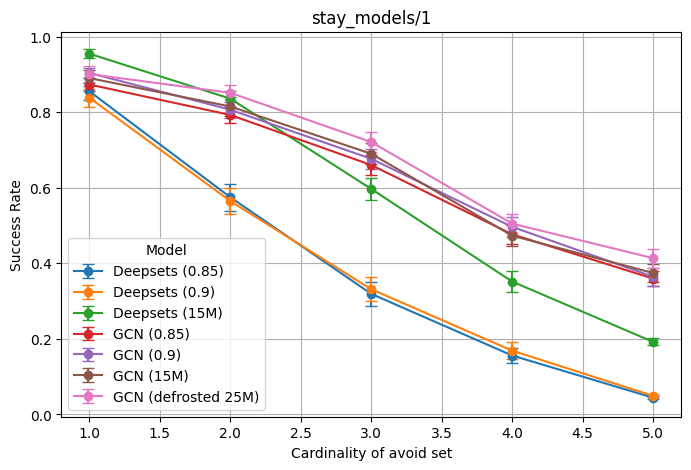

In [24]:
make_ablation_graphs_smaller(goal="stay_models/1")

In [25]:
files_finite_seeds = [
                'ChessWorld-v1_deepsets_stay_update_4_finest',
                'ChessWorld-v1_gcn_formula_big_skip_6_finer',
                'ChessWorld-v1_transformer_stay',
                'ChessWorld-v1_deepsets_trial_4',
                'ChessWorld-v1_deepsets_update_2'
               ]

keys_seeds = ["Deepsets (15M)", "GCN (15M)", "Transformer (15M)", "Deepsets (large avoid)", 'Deepsets (formula)']

dfs_ra, df_ra_mean = seed_read_results("ChessWorld-v1", files_finite_seeds, keys_seeds, list(range(1, 6)))

df_ra_mean

Deepsets (15M)                GCN (15M)  \
                                Successes x/29 Avg Steps Successes x/29   
Task Set                Task ID                                           
Reach                   R_1              29.00      3.72          27.60   
                        R_2              29.00      4.92          29.00   
                        R_3              29.00      7.21          28.80   
Avoid 2                 A2_1             12.00      2.98          26.00   
                        A2_2             27.80      3.40          27.80   
                        A2_3              5.00      1.88          15.40   
                        A2_4             27.80      1.77          28.20   
                        A2_5             18.40      2.78          21.80   
                        A2_6             27.20      3.43          27.80   
Avoid 3                 A3_1              4.20       NaN          18.20   
                        A3_2              9.00      2.61          17.40   
                        A3_3             23.20      3.81          25.20   
                        A3_4             15.00      3.14          19.40   
Avoid 4                 A4_1             10.40      2.07          16.20   
                        A4_2             12.60      2.54          15.60   
                        A4_3             25.60      2.10          27.00   
                        A4_4              8.80      1.80          18.80   
                        A4_5             26.00      1.74          26.60   
Avoid 5                 A5_1             10.00      3.21          18.40   
                        A5_2              7.40       NaN          17.80   
                        A5_3              8.20      2.27          16.60   
                        A5_4              0.80       NaN           9.60   
                        A5_5              3.60       NaN           2.00   
                        A5_6              4.40       NaN          18.00   
Reach Avoid General     RA_1             29.00      3.08          27.80   
                        RA_2             19.80      5.92          20.60   
                        RA_3             26.20      3.92          22.00   
                        RA_4             29.00      2.91          29.00   
                        RA_5             28.60      3.41          26.80   
                        RA_6             19.40      3.52          22.80   
                        RA_7             14.80      4.07          19.40   
Reach Avoid X and not Y RXNY_1           25.20      1.96          22.40   
                        RXNY_2           29.00      1.64          24.60   
                        RXNY_3           18.40      2.78          21.80   
                        RXNY_4           25.80      1.72          22.40   
                        RXNY_5            7.00      1.69          11.00   

                                          Transformer (15M)            \
                                Avg Steps    Successes x/29 Avg Steps   
Task Set                Task ID                                         
Reach                   R_1          4.79             27.20      4.20   
                        R_2          4.71             26.20      5.69   
                        R_3          8.04             15.40       NaN   
Avoid 2                 A2_1         4.43              8.60      2.80   
                        A2_2         3.10             11.00       NaN   
                        A2_3         2.61              7.40      2.00   
                        A2_4         1.64             18.40      2.04   
                        A2_5         2.80             23.00      3.26   
                        A2_6         2.86             17.60      2.80   
Avoid 3                 A3_1         3.15             13.20      3.68   
                        A3_2         3.84             10.40      3.03   
                        A3_3         3.12             18.20      3.59   
           

In [26]:
df_ra_mean.groupby("Task Set").mean()

Deepsets (15M)                GCN (15M)            \
                        Successes x/29 Avg Steps Successes x/29 Avg Steps   
Task Set                                                                    
Avoid 2                          19.70      2.71          24.50      2.91   
Avoid 3                          12.85      3.19          20.05      3.30   
Avoid 4                          16.68      2.05          20.84      2.38   
Avoid 5                           5.73      2.74          13.73      2.51   
Reach                            29.00      5.28          28.47      5.85   
Reach Avoid General              23.83      3.83          24.06      3.48   
Reach Avoid X and not Y          21.08      1.96          20.44      2.13   

                        Transformer (15M)           Deepsets (large avoid)  \
                           Successes x/29 Avg Steps         Successes x/29   
Task Set                                                                     
Avoid 2                             14.33      2.58                  20.37   
Avoid 3                             14.75      3.45                  15.95   
Avoid 4                             15.16      2.16                  19.60   
Avoid 5                              7.40      2.89                   6.83   
Reach                               22.93      4.95                  29.00   
Reach Avoid General                 19.00      3.69                  25.83   
Reach Avoid X and not Y             20.08      2.32                  24.16   

                                  Deepsets (formula)            
                        Avg Steps     Successes x/29 Avg Steps  
Task Set                                                        
Avoid 2                      2.85              25.67      2.98  
Avoid 3                      3.38              19.45      3.02  
Avoid 4                      2.47              24.72      2.41  
Avoid 5                      2.98              14.30      2.59  
Reach                        5.29              28.00      5.21  
Reach Avoid General          4.25              26.66      3.43  
Reach Avoid X and not Y      2.33              24.40      2.18

In [27]:
dfs_ra[1].mean()/ 29


Deepsets (15M)          Successes x/29   0.68
                        Avg Steps        0.10
GCN (15M)               Successes x/29   0.79
                        Avg Steps        0.11
Transformer (15M)       Successes x/29   0.61
                        Avg Steps        0.12
Deepsets (large avoid)  Successes x/29   0.69
                        Avg Steps        0.11
Deepsets (formula)      Successes x/29   0.84
                        Avg Steps        0.10
dtype: float64

In [28]:
files_infinite_seeds = [
                'ChessWorld-v1_deepsets_stay_update_4_finest_inf',
                'ChessWorld-v1_gcn_formula_big_skip_6_finer_inf',
                'ChessWorld-v1_transformer_stay_inf',
                'ChessWorld-v1_deepsets_trial_4_inf',
                'ChessWorld-v1_deepsets_update_2_inf',
               ]

keys_seeds = ["Deepsets (15M)", "GCN (15M)", 'Transformer (15M)', "Deepsets (large avoid)", 'Deepsets (formula)']

dfs_rs, df_rs_mean = seed_read_results("ChessWorld-v1", files_infinite_seeds, keys_seeds, list(range(1, 6)))

df_rs_mean

Deepsets (15M)        GCN (15M)  \
                                      Accepting visits Accepting visits   
Task Set                      Task ID                                     
Reach infinite training       RIT_1              19.48            66.06   
                              RIT_2              31.86            72.70   
                              RIT_3              38.32            75.06   
                              RIT_4              37.98            70.74   
                              RIT_5              18.99            27.34   
                              RIT_6              19.50            56.99   
                              RIT_7              36.67            61.48   
                              RIT_8              19.29            73.42   
                              RIT_9              18.28            73.48   
                              RIT_10             37.77            75.11   
Reach avoid always eventually RAE_1              44.11            35.94   
                              RAE_2              45.74            66.47   
                              RAE_3              37.64            51.19   
                              RAE_4              15.56            26.95   
Reach stay infinite           RSI_1              15.88            53.81   
                              RSI_2              19.22            13.71   
                              RSI_3              35.79            74.17   
                              RSI_4              36.12            37.99   
                              RSI_5              35.79            74.17   

                                      Transformer (15M)  \
                                       Accepting visits   
Task Set                      Task ID                     
Reach infinite training       RIT_1               23.15   
                              RIT_2                3.32   
                              RIT_3               15.90   
                              RIT_4               13.95   
                              RIT_5               32.66   
                              RIT_6               30.21   
                              RIT_7               18.16   
                              RIT_8               34.70   
                              RIT_9               30.34   
                              RIT_10              16.92   
Reach avoid always eventually RAE_1               21.01   
                              RAE_2               39.28   
                              RAE_3               37.60   
                              RAE_4               12.70   
Reach stay infinite           RSI_1               22.86   
                              RSI_2               18.43   
                              RSI_3                8.77   
                              RSI_4               12.93   
                              RSI_5                8.77   

                                      Deepsets (large avoid)  \
                                            Accepting visits   
Task Set                      Task ID                          
Reach infinite training       RIT_1                    26.40   
                              RIT_2                    36.03   
                              RIT_3                    37.50   
                              RIT_4                    30.88   
                              RIT_5                    30.08   
                              RIT_6                    30.54   
                              RIT_7                    37.21   
                              RIT_8                    19.68   
                              RIT_9                    23.03   
                              RIT_10                   35.85   
Reach avoid always eventually RAE_1                    41.06   
                              RAE_2                    44.97   
                              RAE_3                    47.30   
                              RAE_4                    18.97   
Re

In [29]:
df_rs_mean.groupby("Task Set").mean()

,Deepsets (15M),GCN (15M),Transformer (15M),Deepsets (large avoid),Deepsets (formula)
,Accepting visits,Accepting visits,Accepting visits,Accepting visits,Accepting visits
Task Set,,,,,
Reach avoid always eventually,35.76,45.14,27.65,38.07,55.71
Reach infinite training,27.81,65.24,21.93,30.72,30.40
Reach stay infinite,28.56,50.77,14.35,32.72,24.43


In [34]:
def make_latest_ablation_graphs(parent_dir="chessworld8_ablation/stay_update/"):
    all_dfs = [pd.read_csv(parent_dir + str(seed) + "/results.csv", header=[0,1], index_col=0) for seed in range(1, 6)]

    mean_df = pd.concat(all_dfs).groupby(level=0).mean()
    std_df = pd.concat(all_dfs).groupby(level=0).std()

    # print(df_mean)
    
    labels = ["Deepsets (large avoid)", "Deepsets (15M)", "GCN (15M)", "Deepsets (formula)"]
    colors = ["purple", "red", "blue", "black"]
    i = 0
    
    for col in mean_df.columns.levels[0]:
        df_mean = mean_df[col]
        df_std = std_df[col]
        
        plt.plot(df_mean.index, df_mean["successes_mean"], label=col, color=colors[i])  # Mean line
        plt.scatter(df_mean.index, df_mean["successes_mean"], color=colors[i])  # Mean line

        plt.fill_between(df_mean.index,
                         df_mean["successes_mean"] - df_std["successes_mean"],
                         df_mean["successes_mean"] + df_std["successes_mean"],
                         color=colors[i], alpha=0.2)  # Confidence interval

        i += 1

    plt.xlabel("Number of Pieces to Avoid")
    plt.ylabel("Avg successes")
    plt.title("Successes as number of pieces to avoid increases")
    plt.legend(title="Models")
    plt.show()
    
    plt.show()
    

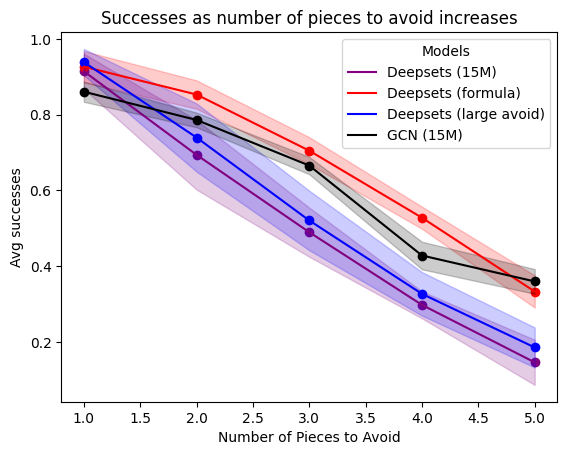

In [35]:
make_latest_ablation_graphs()